## Maryland State Crashes records from 2015-2021

The data we will be working with is the Maryland crashes dataset taken from https://opendata.maryland.gov/. This dataset consists of crashes that occured in the Maryland state from January 2015 to September 2021. This dataset has three sub-datasets which are:

Dataset-1: Maryland Statewide Vehicle Crashes:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu

Dataset-2: Person Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf

Dataset-3: Vehicle Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y

<br>

# Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm

### Exploratory Data Analysis

In [2]:
crashes = pd.read_csv('/Users/nivasreddy/Desktop/601 HW files/Maryland_Statewide_Vehicle_Crashes.csv',low_memory=False)
persons = pd.read_csv('/Users/nivasreddy/Desktop/601 HW files/persons.csv',low_memory=False)
vehicles = pd.read_csv('/Users/nivasreddy/Desktop/601 HW files/vehicles_refined.csv',low_memory=False)

In [3]:
crashes.shape

(715561, 56)

In [4]:
persons.shape

(1664889, 32)

In [5]:
vehicles.shape

(1162313, 22)

In [6]:
crashes.columns

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_DESC', 'LANE_CODE', 'RD_COND_DESC',
       'RD_COND_CODE', 'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC',
       'FIX_OBJ_CODE', 'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC',
       'WEATHER_CODE', 'ACC_DATE', 'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC',
       'SIGNAL_FLAG', 'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE',
       'HARM_EVENT_DESC1', 'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2',
       'HARM_EVENT_CODE2', 'RTE_NO', 'ROUTE_TYPE_CODE', 'RTE_SUFFIX',
       'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC', 'LOGMILE_DIR_FLAG',
       'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC', 'FEET_MILES_FLAG',
       'DISTANCE_DIR_FLAG', 'REFERENCE_NO', 'REFERENCE_TYPE_CODE',
       'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME', 'LATITUDE', 'LONGITUDE',
       'L

In [7]:
vehicles.columns

Index(['Unnamed: 0', 'HARM_EVENT_DESC', 'CONTI_DIRECTION_DESC', 'DAMAGE_DESC',
       'MOVEMENT_DESC', 'VIN_NO', 'REPORT_NO', 'VEH_YEAR', 'VEH_MAKE',
       'COMMERCIAL_FLAG_DESC', 'TOWED_AWAY_FLAG_DESC', 'GOING_DIRECTION_DESC',
       'BODY_TYPE_DESC', 'DRIVERLESS_FLAG_DESC', 'FIRE_FLAG_DESC',
       'PARKED_FLAG_DESC', 'SPEED_LIMIT', 'HIT_AND_RUN_FLAG_DESC',
       'VEHICLE_ID', 'TOWED_VEHICLE_CONFIG_DESC', 'YEAR', 'Quarter'],
      dtype='object')

In [8]:
persons.columns

Index(['Unnamed: 0', 'SEX_DESC', 'SEX_CODE', 'CONDITION_DESC',
       'CONDITION_CODE', 'INJ_SEVER_DESC', 'INJ_SEVER_CODE', 'REPORT_NO',
       'PERSON_TYPE_DESC', 'PERSON_TYPE', 'ALCOHOL_TEST_DESC',
       'ALCOHOL_TEST_CODE', 'DRUG_TEST_DESC', 'DRUG_TEST_CODE',
       'FAULT_FLAG_DESC', 'FAULT_FLAG', 'EQUIP_PROB_DESC', 'EQUIP_PROB_CODE',
       'SAF_EQUIP_DESC', 'SAF_EQUIP_CODE', 'EJECT_DESC', 'EJECT_CODE',
       'DATE_OF_BIRTH', 'PERSON_ID', 'LICENSE_STATE_CODE', 'CLASS',
       'CDL_FLAG_DESC', 'CDL_FLAG', 'VEHICLE_ID', 'AIRBAG_DEPLOYED', 'YEAR',
       'Quarter'],
      dtype='object')

### Removing Unnamed columns

In [9]:
#there are some unnamed columns in the persons and vehicles dataset so we are removing that columns
persons = persons.drop('Unnamed: 0', axis = 1)
vehicles = vehicles.drop('Unnamed: 0', axis = 1)

### Merging the three datasets on the common column 'REPORT_NO'

In [10]:
# Choose columns from each datset based on our needs.
crashes_df=crashes[['ACC_DATE', 'ACC_TIME','WEATHER_DESC','REPORT_NO','COUNTY_DESC','LATITUDE', 'LONGITUDE','SURF_COND_DESC', 'RD_COND_DESC',
       'RD_DIV_DESC']]
persons_df=persons[['REPORT_NO','SEX_DESC','DATE_OF_BIRTH','INJ_SEVER_DESC']]
vehicles_df=vehicles[['VEH_YEAR', 'VEH_MAKE','REPORT_NO','SPEED_LIMIT','YEAR','Quarter']]

In [11]:
# merging crashes and persons
final_data = pd.merge(pd.merge(crashes_df,persons_df,on="REPORT_NO"),vehicles_df,on="REPORT_NO")
final_data.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SURF_COND_DESC,RD_COND_DESC,RD_DIV_DESC,SEX_DESC,DATE_OF_BIRTH,INJ_SEVER_DESC,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,YEAR,Quarter
0,20200618,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,NaN,NaN,No Injury,2019,TOY,5,2020,Q2
1,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Dry,No Defects,One-way Trafficway,Male,19750621,Possible Incapacitating Injury,2005,HYUNDAI,45,2020,Q2
2,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Dry,No Defects,One-way Trafficway,Male,19750621,Possible Incapacitating Injury,2014,SUBA,30,2020,Q2
3,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Dry,No Defects,One-way Trafficway,Male,19750621,Possible Incapacitating Injury,2015,VOLK,30,2020,Q2
4,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Dry,No Defects,One-way Trafficway,NaN,NaN,No Injury,2005,HYUNDAI,45,2020,Q2


In [12]:
final_data.columns

Index(['ACC_DATE', 'ACC_TIME', 'WEATHER_DESC', 'REPORT_NO', 'COUNTY_DESC',
       'LATITUDE', 'LONGITUDE', 'SURF_COND_DESC', 'RD_COND_DESC',
       'RD_DIV_DESC', 'SEX_DESC', 'DATE_OF_BIRTH', 'INJ_SEVER_DESC',
       'VEH_YEAR', 'VEH_MAKE', 'SPEED_LIMIT', 'YEAR', 'Quarter'],
      dtype='object')

In [13]:
final_data.describe()

,ACC_DATE,LATITUDE,LONGITUDE,VEH_YEAR,SPEED_LIMIT,YEAR
count,2.950459e+06,2.950459e+06,2.950459e+06,2.950459e+06,2.950459e+06,2.950459e+06
mean,2.017782e+07,3.913909e+01,-7.674458e+01,2.010270e+03,3.602871e+01,2.017715e+03
std,1.807563e+04,3.028203e-01,4.446217e-01,5.225548e+00,1.525455e+01,1.811540e+00
min,2.015010e+07,3.700000e+01,-7.999610e+01,2.000000e+03,0.000000e+00,2.015000e+03
25%,2.016092e+07,3.898114e+01,-7.694194e+01,2.006000e+03,2.500000e+01,2.016000e+03
50%,2.018032e+07,3.920242e+01,-7.671798e+01,2.011000e+03,3.500000e+01,2.018000e+03
75%,2.019091e+07,3.933824e+01,-7.658360e+01,2.015000e+03,5.000000e+01,2.019000e+03
max,2.021063e+07,3.999480e+01,-7.500000e+01,2.021000e+03,7.500000e+01,2.021000e+03


## Sanity Checks

In [14]:
#Here we found duplicates in report_no column
final_data['REPORT_NO'].value_counts().sort_values()

AE5090000C         1
AE45380033         1
MSP67870029        1
ZK01130025         1
MSP58400057        1
                ... 
MSP6063006C      345
MSP67460095      360
CE4636002C       480
CB53480003      1221
MDTA1229000H    5508
Name: REPORT_NO, Length: 676884, dtype: int64

In [15]:
# Using REPORT_NO, removing duplicates that aren't needed.
final_df=final_data.drop_duplicates(subset="REPORT_NO",keep='first')

In [16]:
final_df['REPORT_NO'].value_counts().sort_values()

AE58770052     1
ADJ9740010     1
EJ7878001D     1
ADI7910042     1
MSP6709008R    1
              ..
MSP691200HR    1
DA4247000J     1
ZVW273000J     1
ADJ203005N     1
AE5414003H     1
Name: REPORT_NO, Length: 676884, dtype: int64

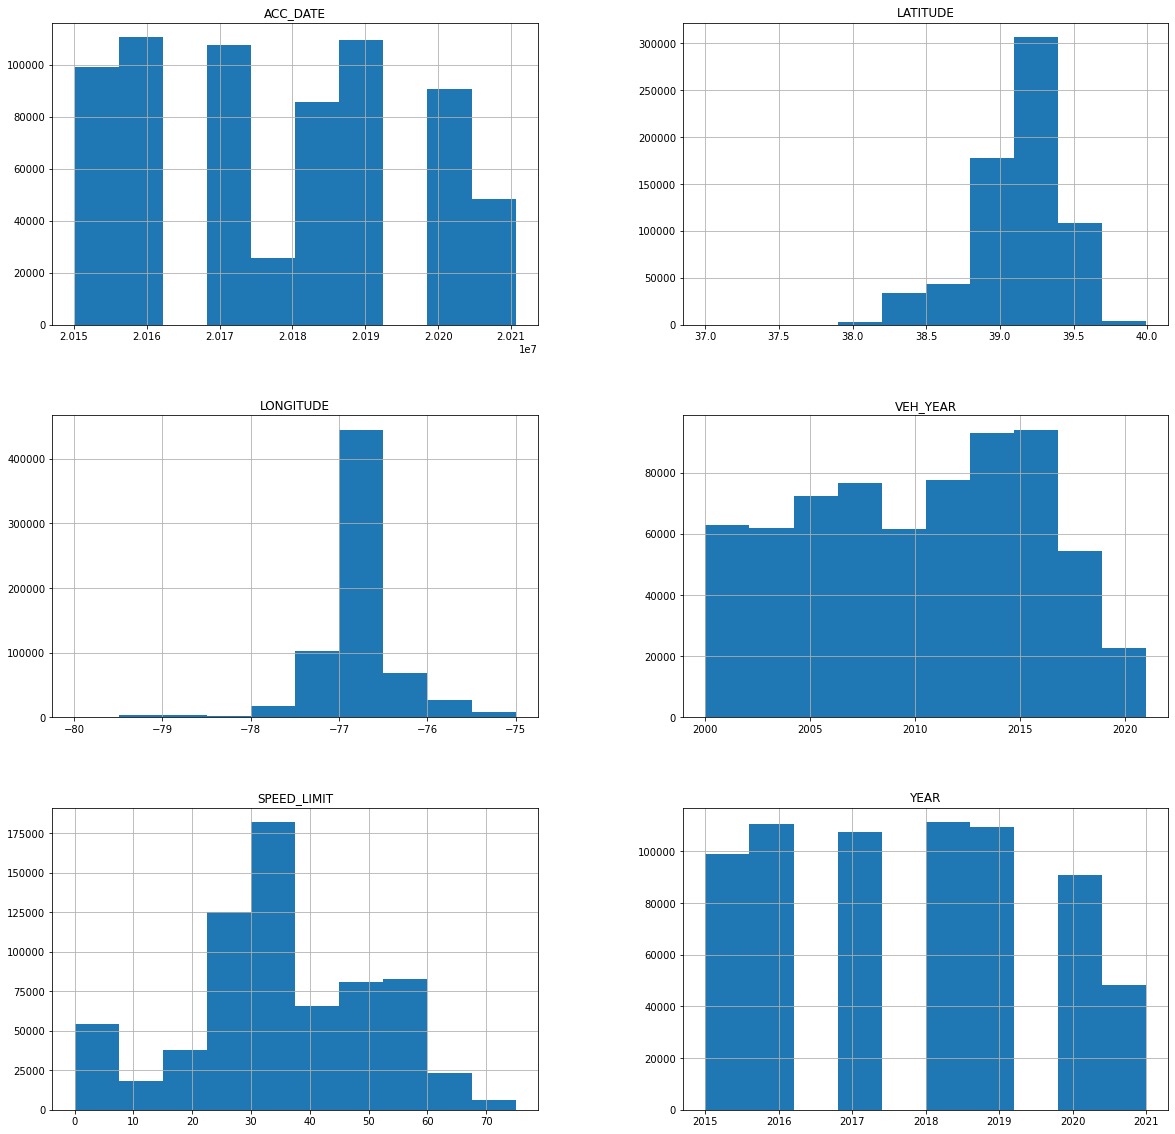

In [17]:
#here we can see that there are no  abnormals values so there is no need of further cleaning
final_df.hist(figsize=(20,20))
plt.show()

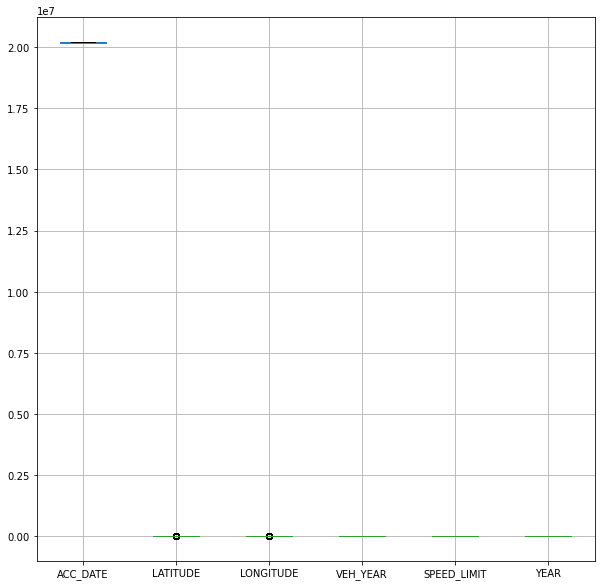

In [18]:
final_df.boxplot(figsize=(10,10))
plt.show()

# Adding columns like age,month,hour,dayof the week for further analysis

In [19]:

final_df['DATE_OF_BIRTH']=pd.to_datetime(final_df['DATE_OF_BIRTH'], errors='coerce')
final_df['DOB_YEAR'] = final_df['DATE_OF_BIRTH'].dt.year

In [20]:
# Calculating the age of a person and storing it in a new variable (column)
final_df['AGE']=2022-final_df['DOB_YEAR']

In [21]:
#Storing accident date into correct format
final_df['accident_date']=pd.to_datetime(final_df['ACC_DATE'],format='%Y%m%d')

In [22]:
#Storing accident date time into correct format
final_df['accident_datetime']=pd.to_datetime(final_df['accident_date'].astype(str)+' '+final_df['ACC_TIME'].astype(str))

In [23]:
final_df.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,SURF_COND_DESC,RD_COND_DESC,RD_DIV_DESC,...,INJ_SEVER_DESC,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,YEAR,Quarter,DOB_YEAR,AGE,accident_date,accident_datetime
0,20200618,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,NaN,NaN,NaN,...,No Injury,2019,TOY,5,2020,Q2,NaN,NaN,2020-06-18,2020-06-18 15:15:00
1,20200430,06:39:00,NaN,ADJ984001J,Baltimore City,39.311025,-76.616429,Dry,No Defects,One-way Trafficway,...,Possible Incapacitating Injury,2005,HYUNDAI,45,2020,Q2,1975.0,47.0,2020-04-30,2020-04-30 06:39:00
19,20200504,09:46:00,NaN,EJ7878001D,Montgomery,39.140680,-77.193413,NaN,NaN,NaN,...,Non-incapacitating Injury,2020,CHEVY,0,2020,Q2,1957.0,65.0,2020-05-04,2020-05-04 09:46:00
21,20170507,10:39:00,Other,ADI7910042,Baltimore City,39.282928,-76.635215,NaN,NaN,NaN,...,Possible Incapacitating Injury,2009,TOYOTA,0,2017,Q2,1955.0,67.0,2017-05-07,2017-05-07 10:39:00
23,20200414,17:32:00,NaN,MSP6709008R,Cecil,39.611028,-75.951314,NaN,NaN,NaN,...,No Injury,2007,KIA,5,2020,Q2,1982.0,40.0,2020-04-14,2020-04-14 17:32:00


In [24]:
final_df.isna().sum()

ACC_DATE                  0
ACC_TIME                  0
WEATHER_DESC         285636
REPORT_NO                 0
COUNTY_DESC               7
LATITUDE                  0
LONGITUDE                 0
SURF_COND_DESC        67722
RD_COND_DESC          65755
RD_DIV_DESC           69507
SEX_DESC              72919
DATE_OF_BIRTH         74490
INJ_SEVER_DESC            0
VEH_YEAR                  0
VEH_MAKE                 45
SPEED_LIMIT               0
YEAR                      0
Quarter                   0
DOB_YEAR              74490
AGE                   74490
accident_date             0
accident_datetime         0
dtype: int64

### Drop Null values

In [25]:
final_df=final_df.dropna()

In [26]:
final_df.isna().sum()

ACC_DATE             0
ACC_TIME             0
WEATHER_DESC         0
REPORT_NO            0
COUNTY_DESC          0
LATITUDE             0
LONGITUDE            0
SURF_COND_DESC       0
RD_COND_DESC         0
RD_DIV_DESC          0
SEX_DESC             0
DATE_OF_BIRTH        0
INJ_SEVER_DESC       0
VEH_YEAR             0
VEH_MAKE             0
SPEED_LIMIT          0
YEAR                 0
Quarter              0
DOB_YEAR             0
AGE                  0
accident_date        0
accident_datetime    0
dtype: int64

### Removing records where speed limit is 0

In [27]:
final_df=final_df[final_df['SPEED_LIMIT']>0]

### Removing records where WEATHER_DESC is Not applicable, Unknown, Other, Null

In [28]:
final_df=final_df[(final_df.WEATHER_DESC != 'Not Applicable') \
                                  & (final_df.WEATHER_DESC != 'Unknown') \
                                  & (final_df.WEATHER_DESC != 'Other') \
                                  & (final_df.WEATHER_DESC != 'null')]

### Removing records where RD_COND_DESC is Not applicable

In [29]:
final_df=final_df[(final_df.RD_COND_DESC != 'Not Applicable')]

### Removing records where SURF_COND_DESC is Not applicable

In [30]:
final_df=final_df[(final_df.SURF_COND_DESC != 'Not Applicable')]

# Visualizations 

### Highest accidents recorded in different years

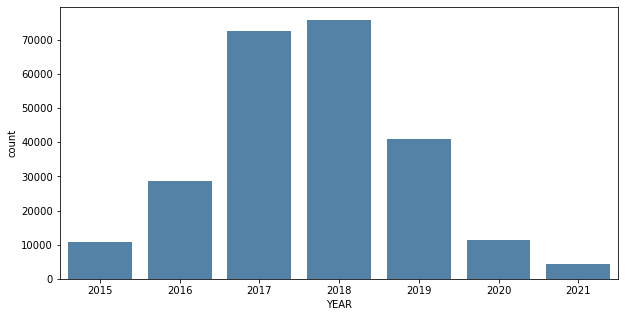

In [31]:
# This graph tells about the  accidents recorded in different years

plt.figure(figsize=(10,5))
sns.countplot(data=final_df, x='YEAR',color='steelblue')
plt.show()

- From the above countplot we can see that 2018 has recorded highest numbder of accidents.And 2020 and 2021 has the lowest accidents due to the pandemic restrictions.

### Crashes recorded on different quarters of years in different years

<Figure size 432x288 with 0 Axes>

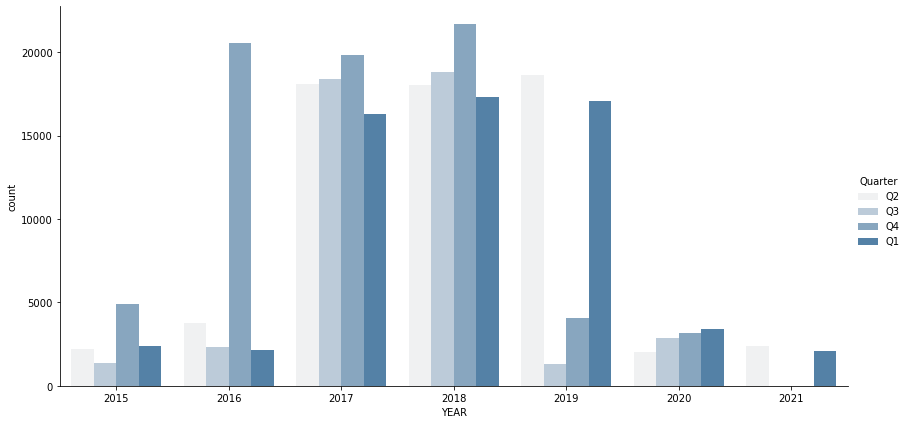

In [32]:
#  this graph tells about the no of crashes in different quaters of years in different years

plt.figure()
fig1 = sns.catplot(data = final_df, x = 'YEAR', kind = 'count', hue ='Quarter', height = 6, aspect = 2,color='steelblue')
plt.show()

- we can see from the above graph that 2nd and 3rd quarters of 2021 least accidents 

### Crashes recorded on different months of year 

In [33]:
#no of crashes recorded in different months in a year
final_df['Month'] = final_df['accident_date'].dt.month_name()

[]

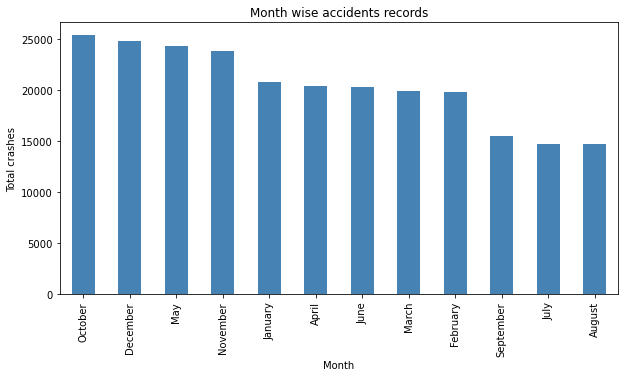

In [34]:
months=final_df['accident_datetime'].dt.month_name().value_counts()

ax = months.plot(kind='bar', figsize=(10,5),color='steelblue')
ax.set(xlabel='Month', ylabel='Total crashes', title='Month wise accidents records')
ax.plot()


    
- from the above graph we can see that october,December and may has highest no of records and july recorded lowest no of accidents
    
- After the spring, the curve progressively declines, and the count is lower in the summer.
    
- We can analyse that in spring there are more accidents took place due to the rain, ice and fog.

### Accidents occured on day of week 

In [35]:
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
final_df['dayOfWeek'] = final_df['accident_date'].dt.dayofweek
final_df['dayOfWeek'] = final_df['dayOfWeek'].apply(lambda x: days[x])

[]

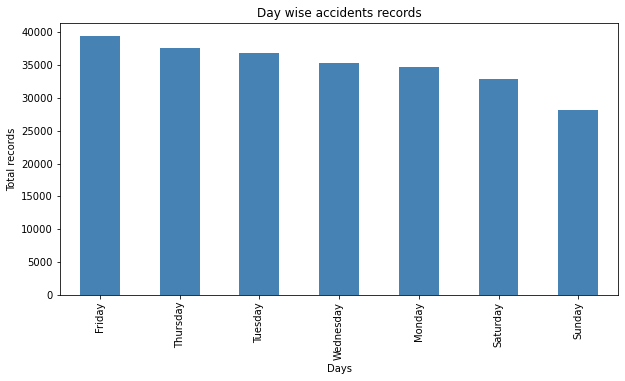

In [36]:
days=final_df['accident_date'].dt.day_name().value_counts()

ax = days.plot(kind='bar', figsize=(10,5),color='steelblue')
ax.set(xlabel='Days', ylabel='Total records', title='Day wise accidents records')
ax.plot()


- According to the above graph, the count is higher on Thursdays and Fridays.
    
- We can see that there is a lot of traffic during the working days, and the chances of a crash are also high.

### Accidents occured on hour of the day

In [37]:
final_df['Hour'] = final_df['accident_datetime'].dt.hour

[]

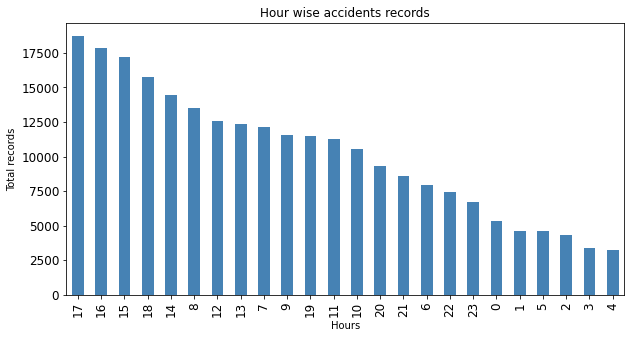

In [38]:
hours=final_df['accident_datetime'].dt.hour.value_counts()

ax = hours.plot(kind='bar',  figsize=(10,5), fontsize=12,color='steelblue')
ax.set(xlabel='Hours', ylabel='Total records', title='Hour wise accidents records')
ax.plot()

  
- According to the above visualization, the more accidents occur between the hours of 15 and 20.
    
- We can analyse that the count of accidents is more at night due to the less visibility the distance is hard to judge at night times.
    

# Analyzing crashes on any month of year

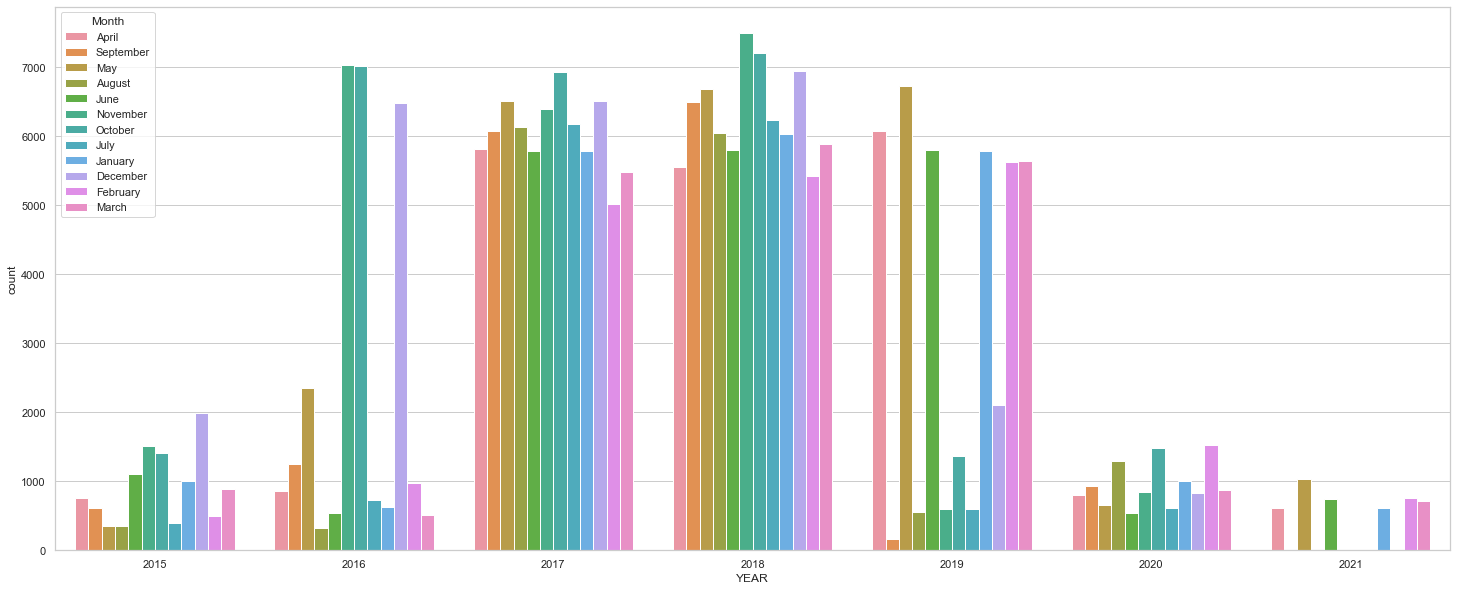

In [39]:
plt.figure(figsize = (25,10))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x = 'YEAR',hue = 'Month',data = final_df)
plt.show()

- The majority of accidents occurred during the first five months of the year, which could be attributed to ice, fog, and cold.

###  Crashes for each shift of day

In [40]:
final_df['Hour'] = final_df['Hour'].astype(str).astype(int)
final_df['accident_shift'] = np.where((final_df['Hour'] >= 6) & (final_df['Hour']<11), 'Morning',
                        np.where((final_df['Hour'] >= 11) & (final_df['Hour']<15), 'Noon',
                               np.where((final_df['Hour'] >= 15) & (final_df['Hour']<18),'Afternoon','Evening')))

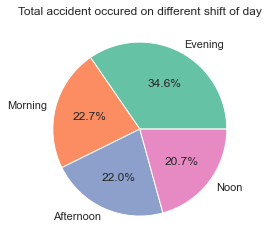

In [41]:
x = final_df['accident_shift'].value_counts().index
y =final_df['accident_shift'].value_counts().values
plt.pie(y,labels=x, autopct = '%1.1f%%', colors = sns.color_palette('Set2'))
plt.title("Total accident occured on different shift of day")
fig =  plt.gcf()
plt.show()

### Crashes occured on according to season 

In [42]:
final_df['season'] = (final_df['accident_date'].dt.month%12 + 3)//3
seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}
final_df['season_name'] = final_df['season'].map(seasons)

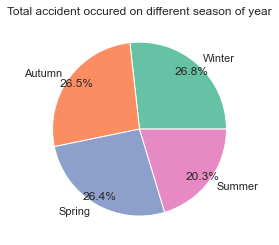

In [43]:
x = final_df['season_name'].value_counts().index
y =final_df['season_name'].value_counts().values

plt.pie(y,labels=x, pctdistance=0.9,autopct = '%1.1f%%', colors = sns.color_palette('Set2'))
plt.title("Total accident occured on different season of year")
fig = plt.gcf()
plt.show()

###  Analysis on county with maximum number of crashes

<Figure size 432x288 with 0 Axes>

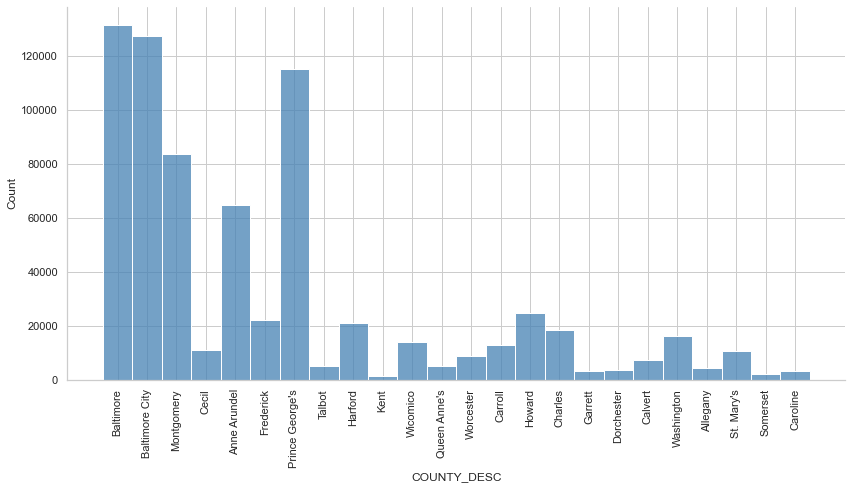

In [44]:
plt.figure()
fig1 = sns.displot(data = crashes, x = 'COUNTY_DESC', kind = 'hist', height = 6, aspect = 2,color='steelblue')
fig1.set_xticklabels(rotation = 90)
plt.show()

- The county with the most reported crashes is Baltimore.



### Crashes in accordance to surface condition

In [48]:
baltimore_data = final_df[final_df['COUNTY_DESC'] == 'Baltimore']

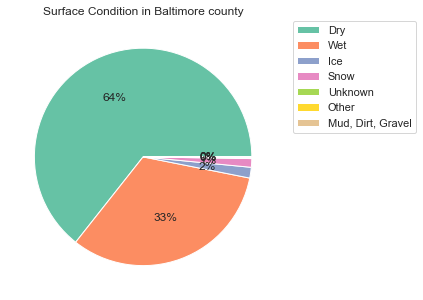

In [49]:
surface_cond = baltimore_data['SURF_COND_DESC'].value_counts()
legend = surface_cond.index
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(surface_cond.values,colors=sns.color_palette('Set2'),autopct='%.0f%%')
ax.legend(legend,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)
plt.title("Surface Condition in Baltimore county")
plt.show() 

- According to the plottings above, crashes in Baltimore County are caused by a two-sided road that is not divided in between.

### Analyzing  crashes based on weather description column.

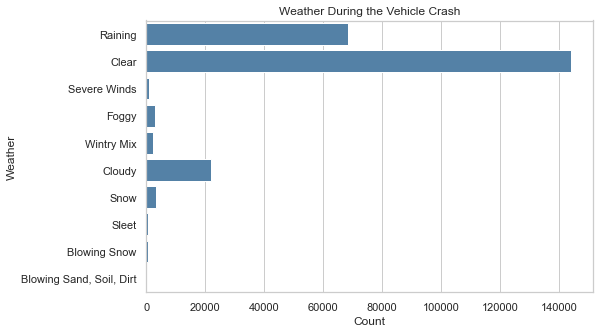

In [47]:
plt.figure(figsize=(8,5))
ax = sns.countplot(y = final_df['WEATHER_DESC'],color='steelblue')
plt.title('Weather During the Vehicle Crash')
plt.xlabel('Count')
plt.ylabel('Weather')
plt.show()

    
- The number increases on rainy days because the roads are wet and there is a greater chance of a skid.

### Plotting the top 10 vehicle types

In [50]:
#no carshes due to the different vehicles
NoOfCrashes=final_df.groupby(['VEH_MAKE'])['accident_date'].count()
NoOfCrashes=NoOfCrashes.sort_values(ascending=False)

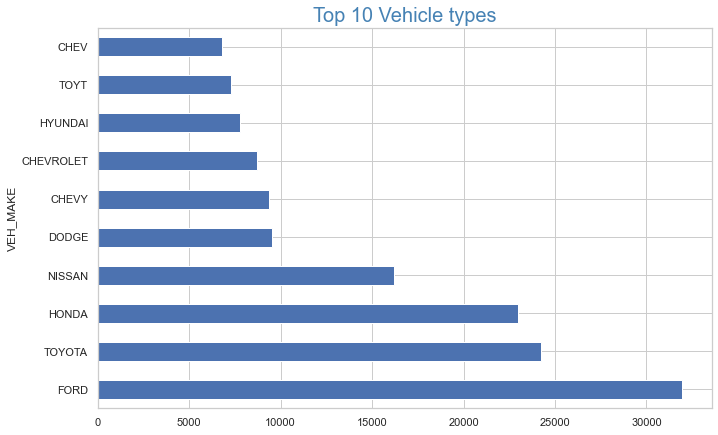

In [51]:
NoOfCrashes=NoOfCrashes.head(10)
plt.figure(figsize=(11,7))
NoOfCrashes.plot(kind='barh', x='VEH_MAKE', y='count')
plt.title("Top 10 Vehicle types", fontdict = {'fontsize': 20,  'color': 'steelblue'})
plt.show()

    
- The majority of the accidents involved Ford vehicles.

### Determing the average age of the drivers who were involved in these accidents for each county

In [52]:
#this graphs shows the average age of drivers involved in these accidents for each county
avg_age=final_df.groupby(['COUNTY_DESC'])['AGE'].mean()
avg_age = round(avg_age,2)

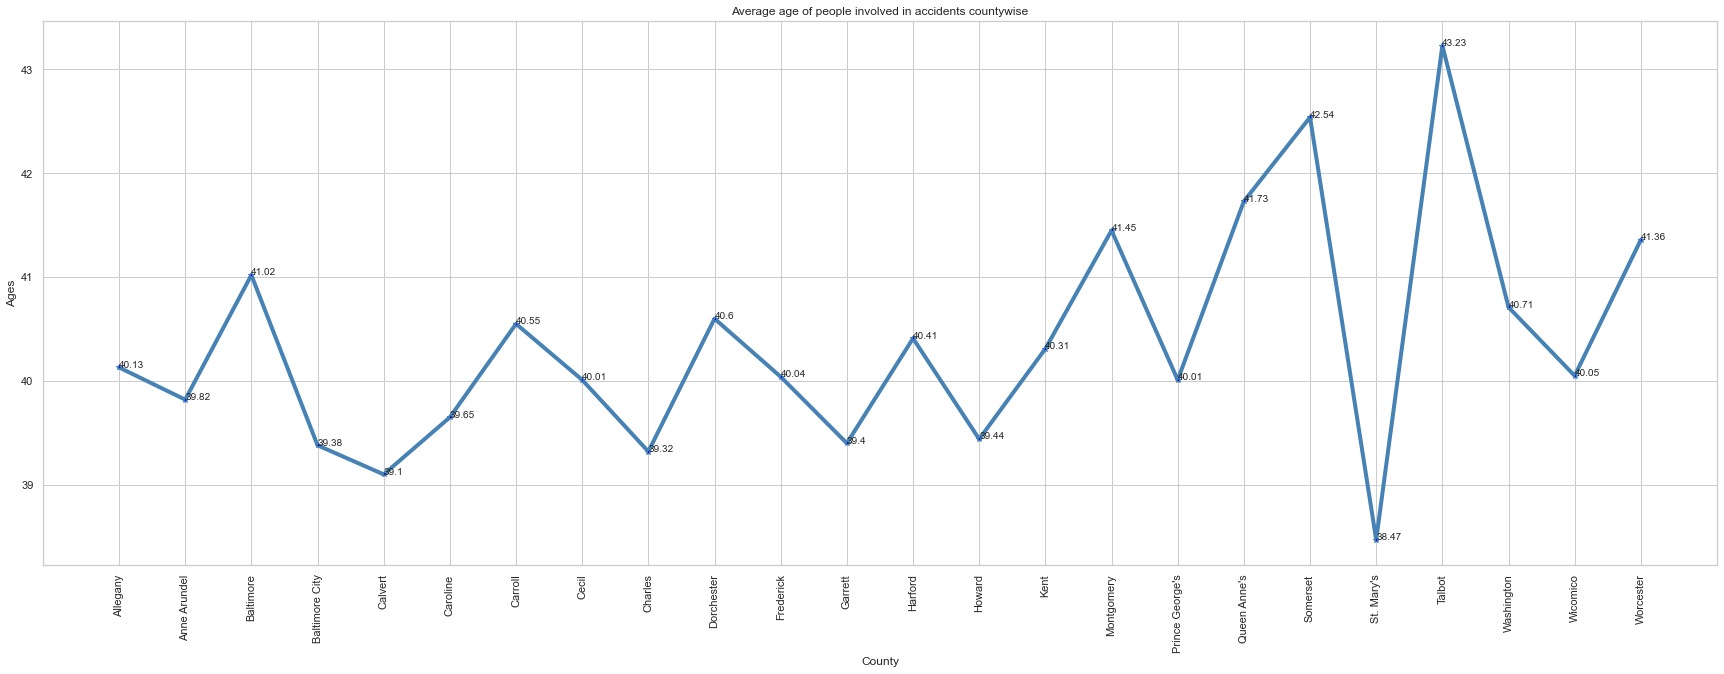

In [53]:
fig, ax = plt.subplots(figsize=(30,10))
average_ages = np.array(avg_age.index)
ages = np.array(avg_age)
for index in range(len(average_ages)):
    ax.text(average_ages[index], ages[index], ages[index], size=10)   
plt.plot(average_ages,ages,marker='*', markerfacecolor='blue',markersize=6, color='steelblue', linewidth=4,label="value_count")
plt.xlabel("County")
plt.ylabel("Ages")
plt.xticks(rotation=90)
plt.title("Average age of people involved in accidents countywise")
plt.show()

# Summary

- The number of crashes reported in the years 2020 and 2021. This might be a result of the pandemic's travel restrictions and lockdowns.
- We can analyse that in spring there are more accidents took place due to the rain, ice and fog.
- We can see that there is a lot of traffic during the working days, and the chances of a crash are also high.
- Most of the crashes at the time of evenings because it low visibility and its hard to judge the length and distance 
- Baltimore have more number of crashes compare to the other county 
